In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../../merge_ChatDaily_ChatGPT1_TweetsJanMar_ChatGPT.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_7840\2800046502.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../merge_ChatDaily_ChatGPT1_TweetsJanMar_ChatGPT.csv')


In [19]:
df.head()

,Unnamed: 0,Date,Text,Language,Likes,Retweets
0,0,2023-01-22 13:44:34+00:00,The unknown background of ChatGPT: Cheap labor...,ja,5.0,0.0
1,1,2023-01-22 13:44:44+00:00,Check out what @fobizz @DianaKnodel brings to ...,de,4.0,0.0
2,2,2023-01-22 13:44:52+00:00,"this GPT chat is great for explaining code, it...",tr,4.0,0.0
3,3,2023-01-22 13:45:00+00:00,But people can make money by selling books tha...,tr,1.0,0.0
4,4,2023-01-22 13:45:10+00:00,Check out what @fobizz @DianaKnodel brings to ...,ja,0.0,0.0


In [20]:
df = df.query('Language == "en"')

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(phrase: str) -> dict:
    """
    Calculates the sentiment scores of a given phrase.

    Args:
        phrase (str): The phrase for which the sentiment scores are calculated.

    Returns:
        dict: The sentiment scores of the given phrase.
    """
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(phrase)

# Use a função
phrase = "This product is not that great"
sentiment_scores = analyze_sentiment(phrase)

# A pontuação 'compound' é a polaridade geral da frase
polarity = sentiment_scores['compound']

print(polarity)


-0.5096


In [ ]:
df['Polarity'] = df['Text'].apply(lambda text: analyze_sentiment(text)['compound'])

Isso aqui em cima demora muito

In [24]:
# Função para limpar o DataFrame
def clean_dataframe(df, date_column, date_format):
    """
    Removes the rows with dates not in the specified format.

    Args:
        df (pandas.DataFrame): The DataFrame to be cleaned.
        date_column (str): The column with the dates.
        date_format (str): The format of the dates.

    Returns:
        pandas.DataFrame: The cleaned DataFrame.
    """
    # Tenta converter a coluna de data para datetime
    df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')

    # Remove as linhas com NaT (Not a Time, usadas para indicar um erro de conversão)
    df = df.dropna(subset=['Date'])

    return df

# Suponha que 'df' seja o seu DataFrame e 'date_column' seja a coluna com as datas
date_format = "%Y-%m-%d %H:%M:%S%z"

# Limpe o DataFrame
df = clean_dataframe(df, 'tweet_created', date_format)

C:\Users\victo\AppData\Local\Temp\ipykernel_7840\3039588896.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')


In [26]:
##testa se todas as datas estão no formato certo
date_format = "%Y-%m-%d %H:%M:%S%z"

try:
    df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    print("Todas as datas estão no formato correto.")
except ValueError as e:
    print("Existem datas que não estão no formato esperado.")
    print("Detalhes do erro:", e)

Todas as datas estão no formato correto.


In [28]:
#ordenada por data
df = df.sort_values('Date')

In [ ]:
df['Points'] = df['polarity'] * (df['impression_count'] * 0.01 + 1)

In [65]:
df.to_csv('df_polarizado_pontos.csv', index=False)

c:\Users\victo\anaconda3\envs\tpICD\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


Fazendo as análises com o df pronto


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../df_polarizado_pontos.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Text,Language,Likes,Retweets,Polarity,Points
0,1071387,2022-11-30 18:13:41+00:00,#ai Models are set to become the search engine...,en,2.0,1.0,-0.3182,-0.54094
1,1071386,2022-11-30 18:22:04+00:00,Just in! \n#ChatGPT - research early stage GPT...,en,1.0,1.0,0.4574,0.73184
2,1071385,2022-11-30 18:26:58+00:00,OK so @OpenAI's new #ChatGPT can basically jus...,en,23176.0,4002.0,0.5904,2550.29184
3,1071384,2022-11-30 18:31:23+00:00,ChatGPT first look - https://t.co/16K2NlmOoY. ...,en,3.0,2.0,0.6885,1.58355
4,1071383,2022-11-30 18:33:33+00:00,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...,en,3.0,0.0,0.0772,0.10036


In [6]:
# Converte a coluna de data para o tipo datetime, se ainda não for
df['Date'] = pd.to_datetime(df['Date'])

# Extrai a data (ano, mês, dia) da coluna de data
df['Date'] = df['Date'].dt.date

In [8]:
df_day = df.groupby('Date').agg({
    'Points': ['mean', 'max'],
    'Polarity': 'mean',
    'Date': 'count' 
})

df_day.columns = ['media_points', 'max_points', 'media_polarity', 'n_linhas']

max_points_df = df[df.groupby('Date')['Points'].transform(max) == df['Points']]

max_points_df = max_points_df.drop_duplicates(['Date', 'Points'])

df_day = pd.merge(df_day.reset_index(), max_points_df[['Date', 'Text']], on='Date', how='left')

df_day.rename(columns={'Text': 'text_max_points'}, inplace=True)


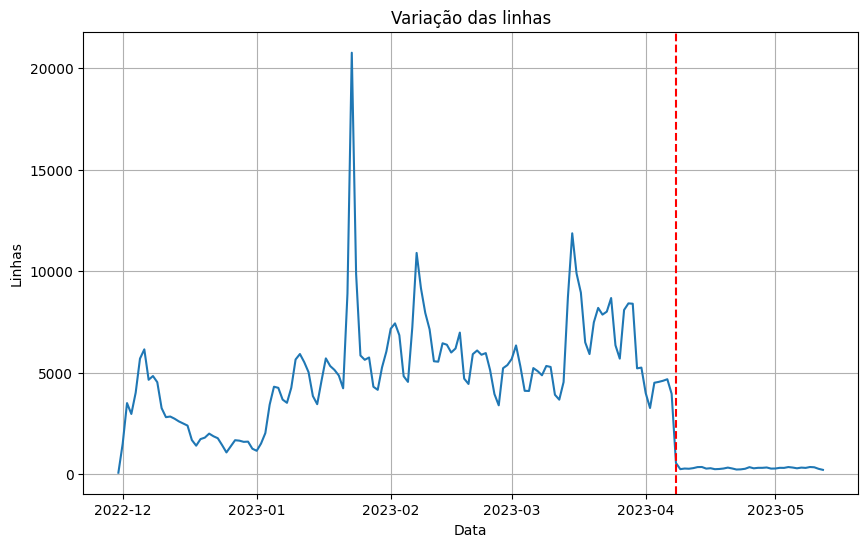

In [9]:
#grafico da quantidade de linhas por dia
plt.figure(figsize=(10,6))
plt.plot(df_day['Date'], df_day['n_linhas'])

dia_queda = pd.to_datetime('2023-04-08')
plt.axvline(x=dia_queda, color='r', linestyle='--')

plt.xlabel('Data')
plt.ylabel('Linhas')
plt.title('Variação das linhas')
plt.grid(True)
plt.show()

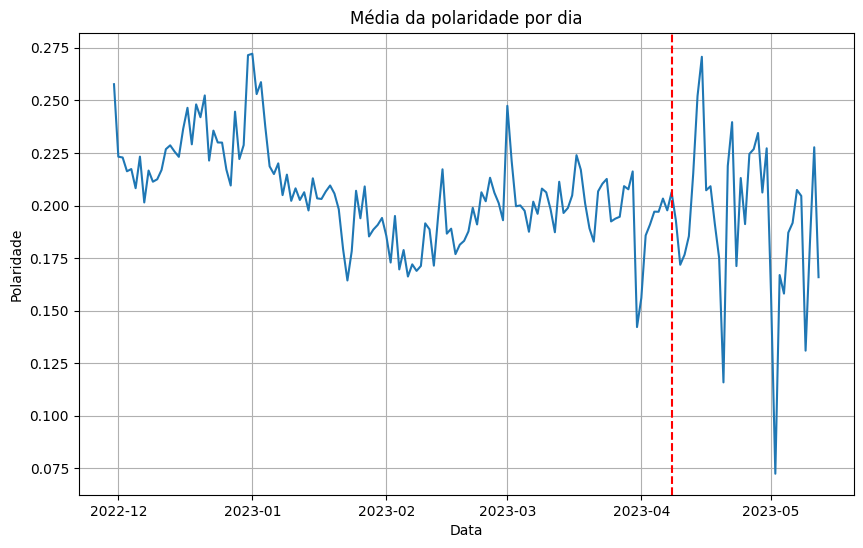

In [10]:
#grafico da média de polaridade por dia
plt.figure(figsize=(10,6))
plt.plot(df_day['Date'], df_day['media_polarity'])

dia_queda = pd.to_datetime('2023-04-08')
plt.axvline(x=dia_queda, color='r', linestyle='--')

plt.xlabel('Data')
plt.ylabel('Polaridade')
plt.title('Média da polaridade por dia')
plt.grid(True)
plt.show()

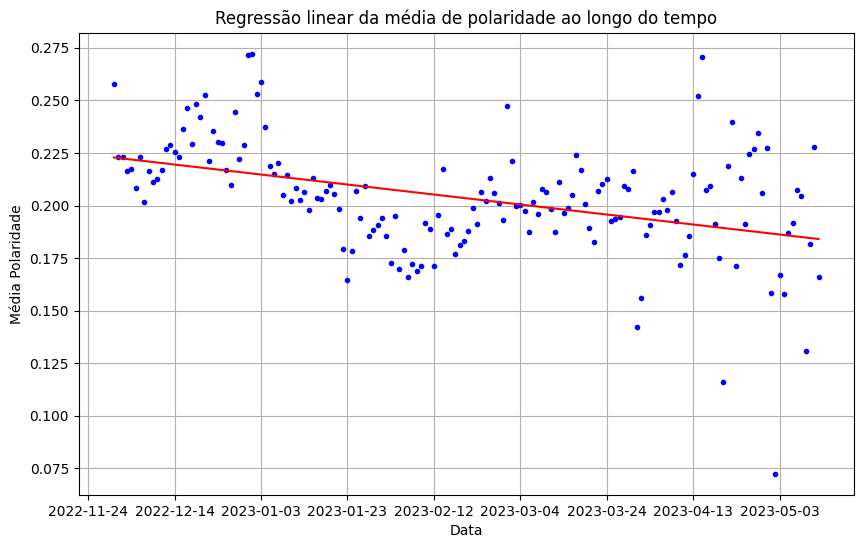

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_day['Date_num'] = mdates.date2num(df_day['Date'])

z = np.polyfit(df_day['Date_num'], df_day['media_polarity'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10,6))

plt.plot(df_day['Date_num'], df_day['media_polarity'], 'b.')
plt.plot(df_day['Date_num'], p(df_day['Date_num']), 'r-')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Data')
plt.ylabel('Média Polaridade')
plt.title('Regressão linear da média de polaridade ao longo do tempo')
plt.grid(True)
plt.show()


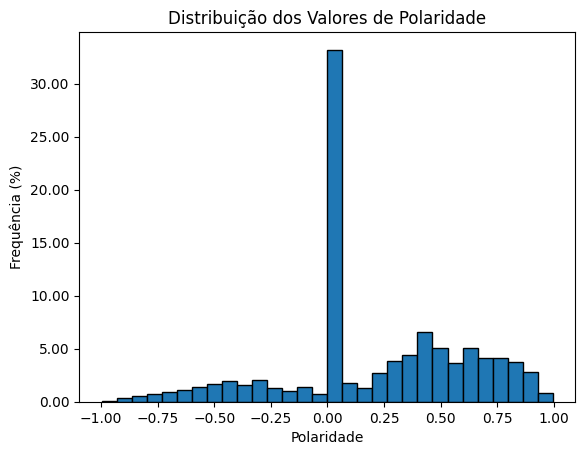

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Cria um histograma utilizando a coluna 'Polarity' e normaliza as frequências
weights = np.ones_like(df['Polarity']) / len(df['Polarity'])
ax.hist(df['Polarity'], weights=weights, bins=30, edgecolor='black')

ax.set_title('Distribuição dos Valores de Polaridade')
ax.set_xlabel('Polaridade')
ax.set_ylabel('Frequência (%)')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{0:.2f}".format(x*100)))

plt.show()
